In [ ]:
!pip install extra-keras-datasets
!pip install --upgrade keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0


In [ ]:
pip install emnist

In [ ]:
from __future__ import print_function
from extra_keras_datasets import emnist
import keras
import numpy as np
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from scipy import io as sio
batch_size = 80
num_classes = 26
epochs = 50

# # input image dimensions
# img_rows, img_cols = 28, 28

# mat = sio.loadmat('emnist-letters.mat')
# data = mat['dataset']

# x_train = data['train'][0,0]['images'][0,0]
# y_train = data['train'][0,0]['labels'][0,0]
# x_test = data['test'][0,0]['images'][0,0]
# y_test = data['test'][0,0]['labels'][0,0]
# Load the EMNIST letters dataset
(x_train, y_train), (x_test, y_test) = emnist.load_data(type='letters')
# Reshape the data to have channel last data format
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

input_shape = (28, 28, 1)
y_test = y_test-1
y_train = y_train-1
print(input_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.03),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

BadZipFile: File is not a zip file

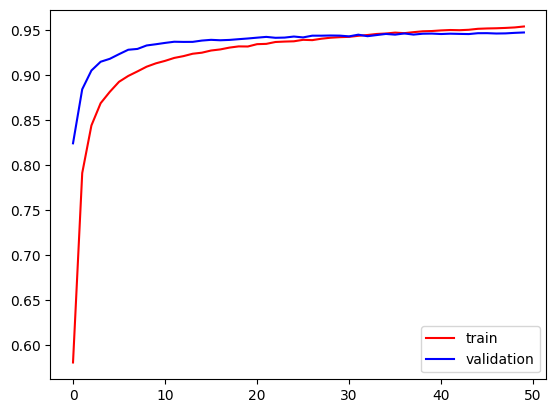

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# # Calculate metrics

# # precision = precision_score(y_test, y_pred_classes, average='micro')
# recall = recall_score(y_test, y_pred_classes, average='micro')
# f1 = f1_score(y_test, y_pred_classes, average='micro')
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

650/650 [==============================] - 3s 4ms/step


ValueError: ignored

In [ ]:
model.save('emnist_letters_model.h5')


In [ ]:
model.save_weights("emnist_letters_model_weights.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#predicting on segmented character images from segmentation module
import os
import cv2
import numpy as np
from keras.models import load_model

# Load the model from the H5 file
loaded_model = load_model('/content/emnist_letters_model.h5')

# Load the model weights from the HDF5 file
loaded_model.load_weights('/content/emnist_letters_model_weights.h5')

# Define the path to the folder containing the unknown images
folder_path = '/content/drive/My Drive/characters'

# Define the path to the folder where the recognized images will be stored
output_folder_path = '/content/Rec'

# Define the letter index corresponding to 't'
letter_t_index = ord('t') - 97

# Loop over all the files in the folder
for filename in os.listdir(folder_path):
    # Read the image file
    img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)

    # Preprocess the image
    img = cv2.resize(img, (28, 28))
    img = np.expand_dims(img, axis=-1)
    img = img.astype('float32') / 255

    # Make a prediction
    pred = loaded_model.predict(np.array([img]))

    # Get the index of the predicted letter
    pred_index = np.argmax(pred)

    # If the predicted letter is 't', store the image in the output folder
    if pred_index == letter_t_index:
        cv2.imwrite(os.path.join(output_folder_path, filename), img * 255)


1/1 [==============================] - 0s 18ms/step
